In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.interpolate as spi

In [10]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sclist = [1.0]
Llist = [0.5, 1.0, 2]
num_empty = 200
res_dir = 'nsc-boundary'
n_perms = 4

In [11]:
numC_np = np.zeros((len(Llist), len(sclist), len(nlist), n_perms))
for Lix, L in enumerate(Llist):
    for scix, sc in enumerate(sclist):
        c = s / sc
        for nix, n in enumerate(nlist):
            for randix in range(0, n_perms):
                true_n = true_nlist[nix]
                fout = (
                    f"nsc-boundary/D={D}_n={float(n)}_N={N:.2e}_"
                    f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
                )
                res = pd.read_csv(fout+'.csv')
                numC_np[Lix, scix, nix, randix]  = res.shape[0]

FileNotFoundError: [Errno 2] No such file or directory: 'nsc-boundary/D=3_n=71.0_N=1.00e+08_s=1.0_L=2.0_c=1.00000e+00_r=0.csv'

<ipython-input-12-31f97c5e6a56>:1: RuntimeWarning: invalid value encountered in true_divide
  CoVs_np = np.std(numC_np, axis=3) / np.mean(numC_np, axis=3)


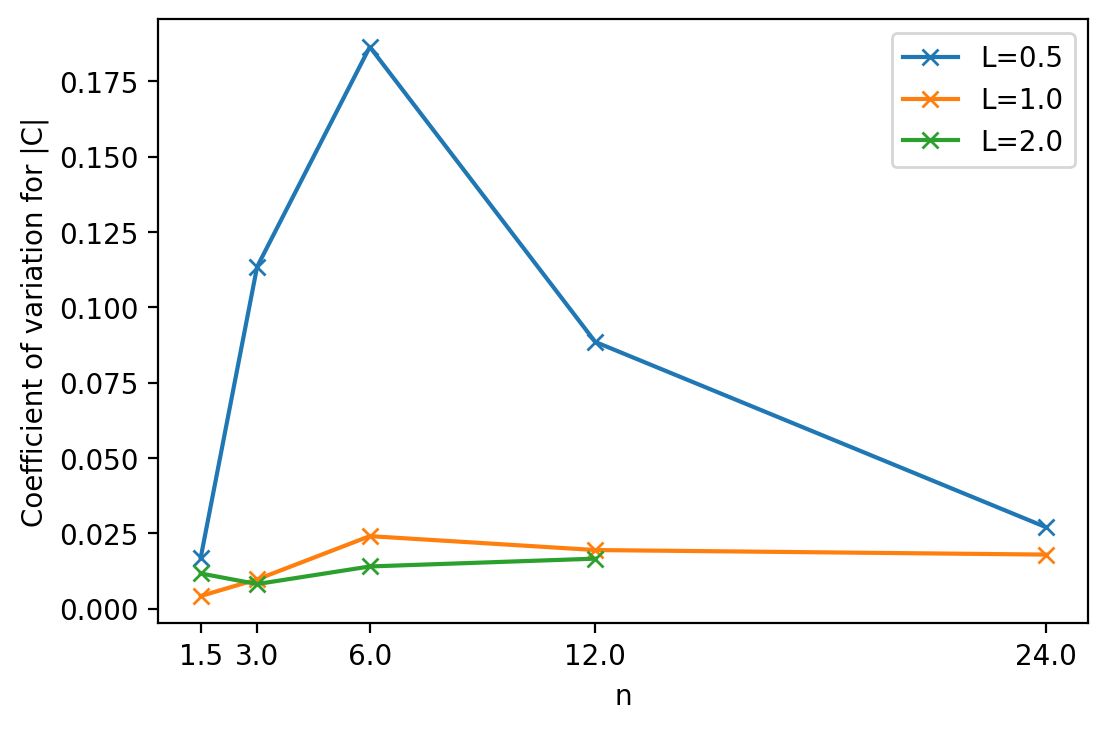

In [12]:
CoVs_np = np.std(numC_np, axis=3) / np.mean(numC_np, axis=3)
leg = []
fig = plt.figure(figsize=(6,4), dpi=200);
for Lix, L in enumerate(Llist):
    for scix, sc in enumerate(sclist):
        c = s / sc
        plt.plot(true_nlist, CoVs_np[Lix, scix,:],'x-');
        leg.append(f'L={L:.1f}');
plt.xlabel('n');
plt.ylabel('Coefficient of variation for |C|');
plt.gca().set_xticks(true_nlist);
plt.legend(leg);
fig.savefig('figures-friday/plotS2.png');

In [5]:
CoVs_np

array([[[0.50033525, 0.51685046, 0.54364781, 0.51315455]],

       [[0.50002119, 0.50031754, 0.50154555, 0.5006457 ]],

       [[0.50016265, 0.50008339, 0.50023002, 0.50035397]]])

In [6]:
numC_np

array([[[[    0.,  1638.,  1631.,  1700.,  1648.],
         [    0.,   345.,   416.,   305.,   391.],
         [    0.,   274.,   369.,   222.,   342.],
         [    0.,   653.,   750.,   586.,   756.]]],


       [[[    0.,  5831.,  5834.,  5775.,  5824.],
         [    0.,  1707.,  1748.,  1722.,  1780.],
         [    0.,  1709.,  1804.,  1705.,  1850.],
         [    0.,  4623.,  4815.,  4581.,  4813.]]],


       [[[    0., 20185., 20689., 20078., 20372.],
         [    0.,  8430.,  8550.,  8357.,  8454.],
         [    0., 10745., 11084., 10713., 10903.],
         [    0., 32614., 33655., 32173., 33114.]]]])

In [7]:
CoVs_np

array([[[0.50033525, 0.51685046, 0.54364781, 0.51315455]],

       [[0.50002119, 0.50031754, 0.50154555, 0.5006457 ]],

       [[0.50016265, 0.50008339, 0.50023002, 0.50035397]]])